<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-required-library" data-toc-modified-id="import-required-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import required library</a></span></li><li><span><a href="#Gathering-all-the-data" data-toc-modified-id="Gathering-all-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gathering all the data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></div>

## import required library

In [1]:
import requests

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [34]:
# url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# r = requests.get(url)

In [35]:
# r

In [36]:
# with open("image_predictions.tsv", "wb") as f:
    # f.write(r.content)

In [37]:
# f

In [3]:
import tweepy

In [8]:

consumer_key = 'lkyVD7kPYg7xRjH56VIdrXndJ'
consumer_secret = 'bqeF9lEHOqVetJMqw5BVTwg3kcdiWdqj22N4t9iNh32NxIDDJK'
access_token = '2617310779-6ZRMSiPhmJw7OZ1nrMS0hIX14YgjQ9S2aUH4jVf'
access_secret = 'fPDKCeUPKa7dg3BLlQ0atUo7IfoNIPEctBLdb4EreeQ47'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
import os
import warnings
import collections
import json

In [10]:
# tw_id = tweet_enhanced['tweet_id'].astype(str).tolist()
#with open('tweet_json.txt', 'w') as tweet_count:
    for tweet in tw_id:
        try:
            tweet_data = api.get_status(tweet, tweet_mode='extended')
        except tweepy.TweepError:
            pass
        else:
            tweet_count.write(json.dumps(tweet_data._json) + '\n')
            print('Retrieved data for tweet id: {}'.format(tweet))
print('Retrieved data for all tweet ids.')

Retrieved data for tweet id: 892420643555336193
Retrieved data for tweet id: 892177421306343426
Retrieved data for tweet id: 891815181378084864
Retrieved data for tweet id: 891689557279858688
Retrieved data for tweet id: 891327558926688256
Retrieved data for tweet id: 891087950875897856
Retrieved data for tweet id: 890971913173991426
Retrieved data for tweet id: 890729181411237888
Retrieved data for tweet id: 890609185150312448
Retrieved data for tweet id: 890240255349198849
Retrieved data for tweet id: 890006608113172480
Retrieved data for tweet id: 889880896479866881
Retrieved data for tweet id: 889665388333682689
Retrieved data for tweet id: 889638837579907072
Retrieved data for tweet id: 889531135344209921
Retrieved data for tweet id: 889278841981685760
Retrieved data for tweet id: 888917238123831296
Retrieved data for tweet id: 888804989199671297
Retrieved data for tweet id: 888554962724278272
Retrieved data for tweet id: 888078434458587136
Retrieved data for tweet id: 88770528938

KeyboardInterrupt: 

In [54]:
tweet_data = []
with open('tweet_json.txt') as data_file:
    for jsn_ob in data_file:
        tweet_order = collections.OrderedDict()
        tweet_data_jsn = json.loads(jsn_ob)
        tweet_order['tweet_id'] = tweet_data_jsn['id']
        tweet_order['retweet_count'] = tweet_data_jsn['retweet_count']
        tweet_order['favorite_count'] = tweet_data_jsn['favorite_count']
        tweet_data.append(tweet_order)


tweet_count = pd.DataFrame(tweet_data)

## Gathering all the data

In [15]:
image_prediction = pd.read_csv('data/image_predictions.tsv', sep = '\t')

In [16]:
image_prediction.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Quality issues:

1. Column name could be more descriptive, like p1 could be p1_algorithm so it immediately comes to mind algorithm 01 when I see p1 I have to think what p1 means every time. 

2. Some time dog name in the p1, p2, p3 columns start with capital letter other time start with small letter. I think it should be consistent.

3. In the p*_conf columns it show six digits after decimal point. Using 3 digits would make it neat and clean

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All the data types seems appropriate. 

In [18]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

There is no missing values.


In [19]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Quality issues:
4. Now it seems that tweet_id datatype should be object. In that case describe function would not calculate anything.

In [20]:
tweet_enhanced = pd.read_csv('data/twitter-archive-enhanced.csv')

In [21]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
tweet_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
tweet_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
tweet_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
tweet_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Quality Issues:

5. Again since we can't calculate anything out of tweet_id so tweet_id should be object type.

6. timestamp column data type listed as object but it should be datetime data type.
7. In the source column, text contain whole url with html tag. Only source name is fine.
8. maximum value for rating_numerator and rating_denominator is 1776 and 170 respectively and minimum value is zero for both.
9. None in the dog stage columns should be NaN as missing value.

Tidiness Issues:
1. There are four columns for dog stage: doggo,	floofer, pupper, and puppo. We only need one column for dog stage.

2. There are few columns like "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", and "retweeted_status_user_id" that mostly contain null value and does not contain any valuable information. 


In [27]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8370,38208
1,892177421306343426,6178,32760
2,891815181378084864,4089,24668
3,891689557279858688,8503,41531
4,891327558926688256,9214,39720


In [28]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
tweet_id          44 non-null int64
retweet_count     44 non-null int64
favorite_count    44 non-null int64
dtypes: int64(3)
memory usage: 1.1 KB


In [29]:
tweet_count.describe()

,tweet_id,retweet_count,favorite_count
count,4.400000e+01,44.000000,44.000000
mean,8.878746e+17,6733.000000,29541.886364
std,2.515389e+15,4937.173337,16690.556628
min,8.838381e+17,4.000000,0.000000
25%,8.858708e+17,3650.250000,21304.000000
50%,8.874955e+17,5296.000000,27395.500000
75%,8.899123e+17,7833.000000,33566.500000
max,8.924206e+17,20159.000000,76374.000000


## Data Cleaning

In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
# change columns name, make it more descriptive
    
image_prediction.rename(columns = {'p1': 'algor_01_pred',
                                  'p1_conf': 'algor_01_confid',
                                  'p1_dog': 'algor_01_dog',
                                   
                                  'p2': 'algor_02_pred',
                                  'p2_conf': 'algor_02_confid',
                                  'p2_dog': 'algor_02_dog',
                                   
                                  'p3': 'algor_03_pred',
                                  'p3_conf': 'algor_03_confid',
                                  'p3_dog': 'algor_03_dog'}, inplace = True)

In [32]:
image_prediction.head()

,tweet_id,jpg_url,img_num,algor_01_pred,algor_01_confid,algor_01_dog,algor_02_pred,algor_02_confid,algor_02_dog,algor_03_pred,algor_03_confid,algor_03_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
# make lower case for all entry
column_name = ['algor_01_pred','algor_02_pred', 'algor_03_pred']
for column in (column_name):
    image_prediction[column] =image_prediction[column].str.lower()

In [34]:
image_prediction.head()

,tweet_id,jpg_url,img_num,algor_01_pred,algor_01_confid,algor_01_dog,algor_02_pred,algor_02_confid,algor_02_dog,algor_03_pred,algor_03_confid,algor_03_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [35]:
# make three digits

column_name = ['algor_01_confid','algor_02_confid', 'algor_03_confid']
for column in (column_name):
    image_prediction[column] = round(image_prediction[column], 3)

In [36]:
image_prediction.head()

,tweet_id,jpg_url,img_num,algor_01_pred,algor_01_confid,algor_01_dog,algor_02_pred,algor_02_confid,algor_02_dog,algor_03_pred,algor_03_confid,algor_03_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465,True,collie,0.157,True,shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,rottweiler,0.244,True,doberman,0.155,True


In [37]:
# 04 change data type
image_prediction['tweet_id'] = image_prediction['tweet_id'].astype(str)


In [38]:
# 5,6 for tweet enhanced
tweet_enhanced['tweet_id']  = tweet_enhanced['tweet_id'].astype(str)
tweet_enhanced['timestamp']  = pd.to_datetime(tweet_enhanced['timestamp'])

In [39]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
algor_01_pred      2075 non-null object
algor_01_confid    2075 non-null float64
algor_01_dog       2075 non-null bool
algor_02_pred      2075 non-null object
algor_02_confid    2075 non-null float64
algor_02_dog       2075 non-null bool
algor_03_pred      2075 non-null object
algor_03_confid    2075 non-null float64
algor_03_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [40]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [41]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
# 7 remove html tag

tweet_enhanced['source'] = tweet_enhanced['source'].str.extract('>(.*?)<')

In [43]:
tweet_enhanced.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [44]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [45]:
tweet_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [55]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8394,38299
1,892177421306343426,6196,32825
2,891815181378084864,4100,24711
3,891689557279858688,8528,41615
4,891327558926688256,9242,39788


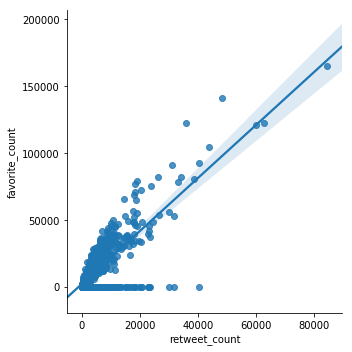

In [56]:
sns.lmplot(x = 'retweet_count', y = 'favorite_count', data = tweet_count);

In [57]:
tweet_count.shape

(2342, 3)

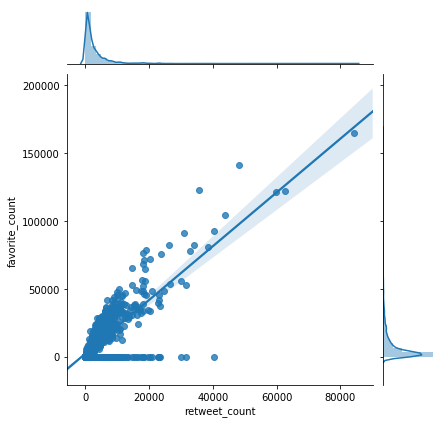

In [58]:
sns.jointplot(x = 'retweet_count', y = 'favorite_count', data = tweet_count, kind="reg");

In [59]:
tweet_count_10 = tweet_count.query('retweet_count < 10000')

In [60]:
tweet_count_10.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8394,38299
1,892177421306343426,6196,32825
2,891815181378084864,4100,24711
3,891689557279858688,8528,41615
4,891327558926688256,9242,39788


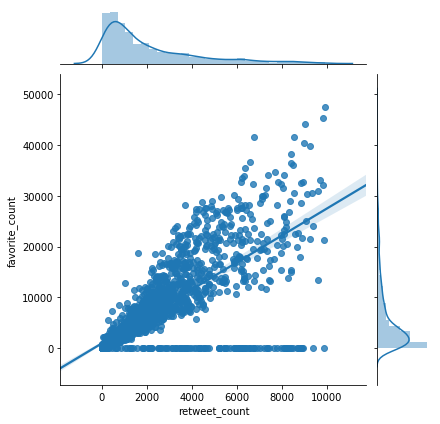

In [61]:
sns.jointplot(x = 'retweet_count', y = 'favorite_count', data = tweet_count_10, kind="reg");